In [1]:
#Importing libraries.
import seaborn as sns
import sklearn as sk 
import pandas as pd
import matplotlib.pyplot as plt 
import math

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Liniear Regression

Liniear regression can help in predicting dependable variables and explain their relationship with the independable variable. 

In [2]:
df = pd.read_csv("data-mashable.csv")
df.head(20)

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375000,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000000,6000,3.778151
5,6,http://mashable.com/2014/04/24/amazing-lebron-...,13,303,2,0,4.970297,0,0,0,...,0,0,0,0,0.394298,0.048684,0.000000,0.000000,1200,3.079181
6,7,http://mashable.com/2013/06/22/social-media-we...,6,544,11,0,4.617647,0,0,0,...,0,1,0,1,0.439512,0.267391,0.500000,0.500000,3500,3.544068
7,8,http://mashable.com/2013/07/09/russian-deletes...,12,223,1,0,4.399103,0,0,0,...,0,0,0,0,0.394792,0.053125,0.218182,0.145455,1500,3.176091
8,9,http://mashable.com/2013/03/07/3d-printed-skull/,8,438,1,0,5.027397,0,0,0,...,0,0,0,0,0.479187,0.166913,0.500000,0.200000,3100,3.491362
9,10,http://mashable.com/2013/11/16/xbox-one-vs-pla...,11,389,1,1,4.642674,0,0,1,...,0,1,0,1,0.417229,0.183895,0.166667,0.000000,27300,4.436163


As there are a lot of variables I can use, I decided to work with 5 with the url deciding the index. 

In [3]:
y = df["shares_log"] #We need to take out the rating as our Y-variable
X = df.loc[:,"n_tokens_title":"average_token_length"] #this slices the dataframe to include all rows and the columns
X.index = df["url"] 
X.head(20)

,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length
url,,,,,
http://mashable.com/2013/10/29/ashton-kutcher-lenovo/,10,821,12,0,4.518879
http://mashable.com/2014/09/08/mashies-sept-19-deadline/,9,489,6,0,5.040900
http://mashable.com/2013/02/01/hello-kitty-rocket/,11,131,0,1,4.877863
http://mashable.com/2014/02/06/add-us-on-snapchat/,8,556,2,0,4.974820
http://mashable.com/2014/01/07/lindsey-vonn-withdraws-sochi-olympics-knee-injury/,9,880,18,0,4.928409
http://mashable.com/2014/04/24/amazing-lebron-james-portrait-comes-to-life-in-artist-time-lapse/,13,303,2,0,4.970297
http://mashable.com/2013/06/22/social-media-wedding-gifts/,6,544,11,0,4.617647
http://mashable.com/2013/07/09/russian-deletes-snowden-tweet/,12,223,1,0,4.399103
http://mashable.com/2013/03/07/3d-printed-skull/,8,438,1,0,5.027397


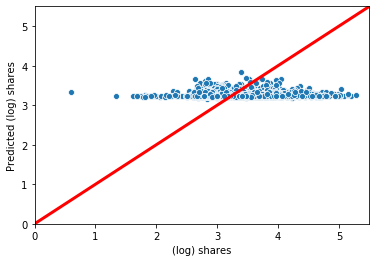

In [24]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel("(log) shares")
plt.ylabel("Predicted (log) shares")
plt.xlim([0,5.5]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([0,5.5])
plt.plot([0,5.5], [0,5.5], color='red', lw=3) #Plot a diagonal length
plt.show()

We now have our x and y, and can start training the model. First, let's split the data into a training set and a test set.

In [4]:
#This built-in function from sk-learn splits the data set randomly into a train set and a test set
#By stating random_state = 1, we use one particular "random state" (we could use any number, it's a so-called "random seed"). 
#This means if we run the code again, it will produce the same results. Which can be handy.
#test_size = 0.3, so I'm splitting the data into 70% training data and 30% test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length
url,,,,,
http://mashable.com/2013/02/03/puppy-bowl-online/,7,141,0,1,4.560284
http://mashable.com/2014/09/11/bridesmaid-lost-dress-sydney/,9,392,9,0,4.732143
http://mashable.com/2013/03/08/facebook-acquires-storylane/,9,622,1,0,4.710611
http://mashable.com/2014/04/29/yahoo-mail-app-redesign/,12,251,23,1,4.669323
http://mashable.com/2013/08/28/chef-knife-moves-video/,8,940,13,2,4.511702


Now, we have to train the liniear model.

In [5]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

And have a look at the coefficients 

In [6]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
-0.003660,n_tokens_title
-0.000007,n_tokens_content
0.004610,num_imgs
0.004298,num_videos
-0.020109,average_token_length


In [7]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.009583152971095688

In [8]:
math.sqrt(mean_squared_error(y_test, y_test_p))

0.4040813659518982

In [23]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = df[["num_imgs"]] 
y = df["shares_log"]
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

print(f"The regression line is equal to y = {b0:.3f} + {b1:.3f}X") #.0f formats to 3 decimals.

The regression line is equal to y = 3.235 + 0.004X


$y = 3.235 + 0.004X$
Where y is (log) shares and x is number of images in an article.


At this point I was confused and I didn't know what to do. 